In [22]:
import os
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, GridSearchCV
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
os.chdir("C:\\Users\\HP\\Desktop\\code challenges\\datasets")

In [3]:
df =pd.read_csv("AirPassengers.csv")

In [4]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
result = seasonal_decompose(df['#Passengers'], model='multiplicative', period=12)


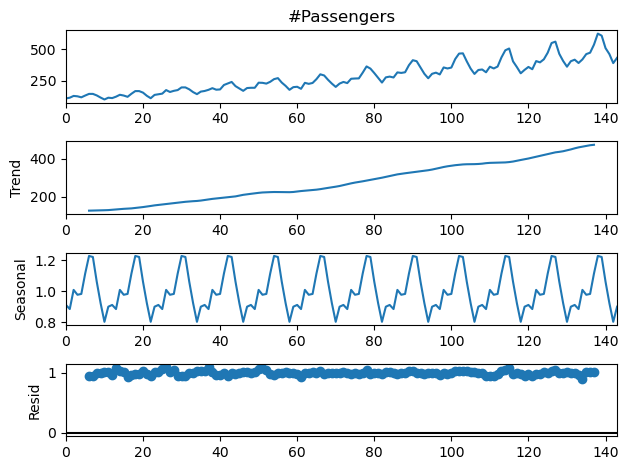

In [11]:
result.plot()
plt.show()

In [12]:
trend = result.trend.dropna()
seasonal = result.seasonal.dropna()
residual = result.resid.dropna()

In [13]:
features = pd.DataFrame({'trend': trend, 'seasonal': seasonal, 'residual': residual})
features['#Passengers'] = df['#Passengers']


In [15]:
for lag in range(1, 13):
    features[f'lag_{lag}'] = df['#Passengers'].shift(lag)


In [16]:
features.dropna(inplace=True)

In [18]:
X = features.drop(columns=['#Passengers'])
y = features['#Passengers']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [23]:
model = RandomForestRegressor(random_state=42)


In [24]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [25]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [26]:
best_model = grid_search.best_estimator_

In [27]:
y_pred = best_model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1759.1886615384622


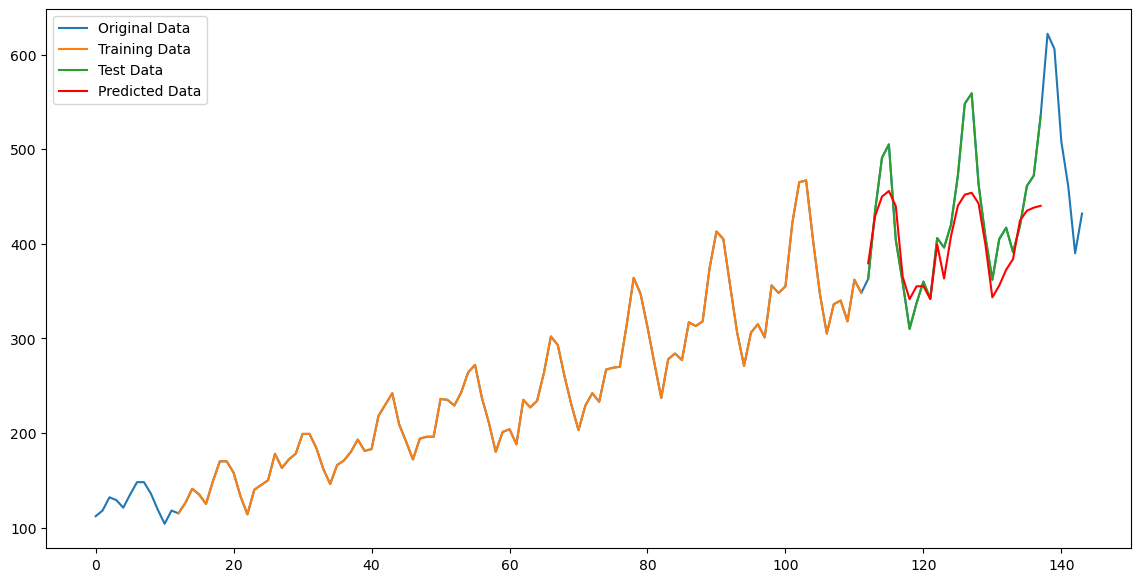

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['#Passengers'], label='Original Data')
plt.plot(y_train.index, y_train, label='Training Data')
plt.plot(y_test.index, y_test, label='Test Data')
plt.plot(y_test.index, y_pred, label='Predicted Data', color='red')
plt.legend()
plt.show()